In [3]:
# Data cleaning 

In [1697]:
import pickle
import pandas as pd
df1 = pd.read_pickle("movies2018.pickle")
df2 = pd.read_pickle("movies2017.pickle")
df3 = pd.read_pickle("movies2016.pickle")

In [1698]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [1699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
distributor             900 non-null object
domestic_total_gross    900 non-null int64
genre                   900 non-null object
movie_title             900 non-null object
opening_weekend         900 non-null object
production_budget       900 non-null object
rating                  900 non-null object
worldwide_gross         900 non-null object
dtypes: int64(1), object(7)
memory usage: 56.3+ KB


In [1700]:
df.rating.unique()

array(['PG-13', 'PG', 'R', 'Unrated', 'G', 'Not Yet Rated', 'Unknown'], dtype=object)

In [1701]:
df = df[df["rating"] != "Unrated"]
df = df[df["rating"] != "Unknown"]
df = df[df["rating"] != "Not Yet Rated"]

In [1702]:
df.rating.unique()

array(['PG-13', 'PG', 'R', 'G'], dtype=object)

In [1703]:
df.production_budget = pd.to_numeric(df['production_budget'], errors='coerce')
df.opening_weekend   = pd.to_numeric(df['opening_weekend'], errors='coerce')
df.worldwide_gross   = pd.to_numeric(df['worldwide_gross'], errors='coerce')
df.domestic_total_gross   = pd.to_numeric(df['domestic_total_gross'], errors='coerce')

In [1704]:
df.loc[(df["genre"] == "Sci-Fi Horror") | (df["genre"] == "Action Horror") ,"genre"] = "Horror"

In [1705]:
df.loc[(df["genre"] == "Music Drama")| (df["genre"] == "Historical Drama") | (df["genre"] == "War Drama") | (df["genre"] == "Action Drama")|(df["genre"] == "Comedy / Drama") |(df["genre"] == "Fantasy Drama")| (df["genre"] == "Sports Drama") | (df["genre"] == "Crime Drama"), "genre"] = "Drama"

In [1706]:
df.loc[(df["genre"] == "Sci-Fi Thriller") |(df["genre"] == "Horror Thriller")| (df["genre"] == "Crime Thriller")|(df["genre"] == "Romantic Thriller") | (df["genre"] == "Comedy Thriller") | (df["genre"] == "Drama / Thriller"), "genre"] = "Thriller"



In [1707]:
df.loc[(df["genre"] == "Romantic Comedy")| (df["genre"] == "Adventure Comedy") | (df["genre"] == "Crime Comedy")|(df["genre"] == "Family Comedy") |  (df["genre"] == "Sci-Fi Comedy")| (df["genre"] == "Horror Comedy"),"genre"] = "Comedy"



In [1708]:
df.loc[(df["genre"] == "Action / Adventure")  | (df["genre"] == "Sci-Fi Action") | (df["genre"] == "Action Fantasy")| (df["genre"] == "Action Comedy") | (df["genre"] == "Action / Crime") | (df["genre"] == "Action Thriller"), "genre"] = "Action"

In [1709]:
df.loc[(df["genre"] == "Family Adventure") |(df["genre"] == "Period Adventure") | (df["genre"] == "Sci-Fi Adventure")  ,"genre"] = "Adventure"

In [1710]:
df = df[df["genre"] != "Foreign"]
df = df[df["genre"] != "Western"]
df = df[df["genre"] != "Sports"]
df = df[df["genre"] != "Documentary"]
df = df[df["genre"] != "Musical"]
df = df[df["genre"] != "Family"]
df = df[df["genre"] != "Documentary"]
df = df[df["genre"] != "Animation"]
df = df[df["genre"] != "Fantasy"]
df = df[df["genre"] != "Sci-Fi"]
df = df[df["genre"] != "Sci-Fi Fantasy"]
df = df[df["genre"] != "War"]
df = df[df["genre"] != "Concert"]
df = df[df["genre"] != "Historical Epic"]

In [1711]:
df.genre.unique()

array(['Action', 'Thriller', 'Comedy', 'Horror', 'Romance', 'Drama',
       'Adventure', 'Crime'], dtype=object)

In [1713]:
df = df[(df["distributor"] == "Universal") | (df["distributor"] == "Fox") | (df["distributor"] == "Warner Bros.") | (df["distributor"] == "Sony / Columbia") | (df["distributor"] == "Buena Vista")]

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1206b2a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120a05c50>]], dtype=object)

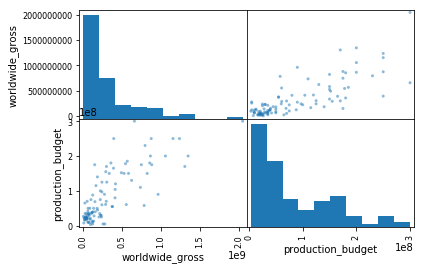

In [1714]:
pd.scatter_matrix(df[['worldwide_gross', 'production_budget']])

In [1715]:
#pd.scatter_matrix(df[['log_domestic_total_gross', 'log_production_budget']])

In [1716]:
#import numpy as np
#df['log_domestic_total_gross'] = np.log(df['domestic_total_gross'])
#df['log_production_budget']    = np.log(df['production_budget'])
#df['log_opening_weekend']      = np.log(df['opening_weekend'])
#df['log_worldwide_gross']      = np.log(df['worldwide_gross'])

In [1717]:
df.head()

,distributor,domestic_total_gross,genre,movie_title,opening_weekend,production_budget,rating,worldwide_gross
0,Buena Vista,700059566,Action,Black Panther,202003951.0,200000000.0,PG-13,1.346909e+09
1,Buena Vista,678815482,Action,Avengers: Infinity War,257698183.0,300000000.0,PG-13,2.046626e+09
3,Universal,416769345,Action,Jurassic World: Fallen Kingdom,148024610.0,170000000.0,PG-13,1.304808e+09
4,Fox,318490305,Action,Deadpool 2,125507153.0,110000000.0,R,7.342448e+08
6,Buena Vista,216417757,Action,Ant-Man and the Wasp,75812205.0,130000000.0,PG-13,6.220303e+08


In [1718]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [1719]:
model = smf.ols(formula= 'worldwide_gross ~  domestic_total_gross + opening_weekend + production_budget + distributor + genre + rating', data = df)



In [1720]:
results = model.fit()

In [1721]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     64.51
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           3.24e-39
Time:                        20:15:56   Log-Likelihood:                -1966.8
No. Observations:                  99   AIC:                             3966.
Df Residuals:                      83   BIC:                             4007.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.138e+08   4.77e+07     -2.387      0.019   -2.09e+08    -1.9e+07
distributor[T.Fox]              9.238e+07   4.93e+07      1.876      0.064   -5.58e+06     1.9e+08
distributor[T.Sony / Columbia]  1.423e+08   5.51e+07      2.584      0.012    3.28e+07    2.52e+08
distributor[T.Universal]        1.313e+08   4.89e+07      2.683      0.009    3.39e+07    2.29e+08
distributor[T.Warner Bros.]     2.631e+07   4.68e+07      0.562      0.575   -6.67e+07    1.19e+08
genre[T.Adventure]              1.589e+06   5.41e+07      0.029      0.977   -1.06e+08    1.09e+08
genre[T.Comedy]                -1.759e+07   4.11e+07     -0.427      0.670   -9.94e+07    6.42e+07
genre[T.Crime]                 -7.903e-09    3.6e-08     -0.219      0.827   -7.95e-08    6.37e-08
genre[T.Drama]                  8.122e+07   4.63e+07      1.755      0.083   -1.08e+07    1.73e+08
genre[T.Horror]                -1.066e+07   5.55e+07     -0.192      0.848   -1.21e+08    9.98e+07
genre[T.Romance]                8.457e+07   8.84e+07      0.957      0.341   -9.12e+07     2.6e+08
genre[T.Thriller]               1.778e+07   4.26e+07      0.417      0.678    -6.7e+07    1.03e+08
rating[T.PG]                   -3.687e+07   4.78e+07     -0.771      0.443   -1.32e+08    5.83e+07
rating[T.PG-13]                -3.661e+07   2.68e+07     -1.364      0.176      -9e+07    1.68e+07
rating[T.R]                     -4.03e+07      3e+07     -1.345      0.182   -9.99e+07    1.93e+07
domestic_total_gross               1.5671      0.267      5.879      0.000       1.037       2.097
opening_weekend                    1.1490      0.863      1.331      0.187      -0.568       2.866
production_budget                  1.7264      0.308      5.600      0.000       1.113       2.340
==============================================================================
Omnibus:                       26.076   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.475
Skew:                           0.971   Prob(JB):                     3.31e-13
Kurtosis:                       6.187   Cond. No.                     6.62e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1722]:
model = smf.ols(formula= 'worldwide_gross ~  domestic_total_gross + opening_weekend + production_budget + distributor + genre ', data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     76.22
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           4.28e-41
Time:                        20:16:06   Log-Likelihood:                -1966.8
No. Observations:                  99   AIC:                             3962.
Df Residuals:                      85   BIC:                             3998.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.514e+08   6.19e+07     -2.445      0.017   -2.75e+08   -2.83e+07
distributor[T.Fox]              9.132e+07   4.75e+07      1.923      0.058   -3.08e+06    1.86e+08
distributor[T.Sony / Columbia]  1.416e+08   5.34e+07      2.654      0.009    3.55e+07    2.48e+08
distributor[T.Universal]        1.311e+08   4.79e+07      2.740      0.007     3.6e+07    2.26e+08
distributor[T.Warner Bros.]     2.579e+07    4.5e+07      0.573      0.568   -6.37e+07    1.15e+08
genre[T.Adventure]              1.733e+06   5.18e+07      0.033      0.973   -1.01e+08    1.05e+08
genre[T.Comedy]                -1.834e+07   4.02e+07     -0.456      0.650   -9.83e+07    6.16e+07
genre[T.Crime]                 -6.183e-08   3.09e-08     -1.999      0.049   -1.23e-07   -3.41e-10
genre[T.Drama]                  8.099e+07   4.56e+07      1.778      0.079   -9.59e+06    1.72e+08
genre[T.Horror]                -1.054e+07   5.48e+07     -0.192      0.848    -1.2e+08    9.85e+07
genre[T.Romance]                8.183e+07   8.48e+07      0.965      0.337   -8.68e+07     2.5e+08
genre[T.Thriller]               1.654e+07    4.1e+07      0.403      0.688    -6.5e+07    9.81e+07
domestic_total_gross               1.5709      0.262      6.001      0.000       1.050       2.091
opening_weekend                    1.1340      0.845      1.342      0.183      -0.546       2.814
production_budget                  1.7346      0.298      5.817      0.000       1.142       2.327
==============================================================================
Omnibus:                       25.630   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.955
Skew:                           0.958   Prob(JB):                     7.07e-13
Kurtosis:                       6.146   Cond. No.                     9.65e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.17e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1723]:
df = df.drop(columns=['rating'])
distributor_dummy = pd.get_dummies(df['distributor'], drop_first=True, prefix='dist')
genre_dummy       = pd.get_dummies(df['genre'], drop_first=True, prefix='genre')

In [1724]:
new_df = pd.concat([df.drop(['distributor', 'genre'], axis=1), distributor_dummy, genre_dummy ], axis = 1)


In [1725]:
new_df.columns

Index(['domestic_total_gross', 'movie_title', 'opening_weekend',
       'production_budget', 'worldwide_gross', 'dist_Fox',
       'dist_Sony / Columbia', 'dist_Universal', 'dist_Warner Bros.',
       'genre_Adventure', 'genre_Comedy', 'genre_Crime', 'genre_Drama',
       'genre_Horror', 'genre_Romance', 'genre_Thriller'],
      dtype='object')

In [1726]:
new_df = new_df.rename(columns={'dist_Sony / Columbia': 'dist_Sony_Columbia'})
new_df = new_df.rename(columns={'dist_Warner Bros.': 'dist_Warner_Bros'})


In [1729]:
model = smf.ols(formula= 'worldwide_gross ~  domestic_total_gross + opening_weekend  + production_budget + dist_Fox + dist_Sony_Columbia + dist_Universal + dist_Warner_Bros + genre_Adventure + genre_Comedy + genre_Crime + genre_Drama + genre_Horror + genre_Romance + genre_Thriller', data = new_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     76.22
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           4.28e-41
Time:                        20:18:05   Log-Likelihood:                -1966.8
No. Observations:                  99   AIC:                             3962.
Df Residuals:                      85   BIC:                             3998.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.514e+08   6.19e+07     -2.445      0.017   -2.75e+08   -2.83e+07
domestic_total_gross     1.5709      0.262      6.001      0.000       1.050       2.091
opening_weekend          1.1340      0.845      1.342      0.183      -0.546       2.814
production_budget        1.7346      0.298      5.817      0.000       1.142       2.327
dist_Fox              9.132e+07   4.75e+07      1.923      0.058   -3.08e+06    1.86e+08
dist_Sony_Columbia    1.416e+08   5.34e+07      2.654      0.009    3.55e+07    2.48e+08
dist_Universal        1.311e+08   4.79e+07      2.740      0.007     3.6e+07    2.26e+08
dist_Warner_Bros      2.579e+07    4.5e+07      0.573      0.568   -6.37e+07    1.15e+08
genre_Adventure       1.733e+06   5.18e+07      0.033      0.973   -1.01e+08    1.05e+08
genre_Comedy         -1.834e+07   4.02e+07     -0.456      0.650   -9.83e+07    6.16e+07
genre_Crime          -7.584e-08   4.69e-07     -0.162      0.872   -1.01e-06    8.56e-07
genre_Drama           8.099e+07   4.56e+07      1.778      0.079   -9.59e+06    1.72e+08
genre_Horror         -1.054e+07   5.48e+07     -0.192      0.848    -1.2e+08    9.85e+07
genre_Romance         8.183e+07   8.48e+07      0.965      0.337   -8.68e+07     2.5e+08
genre_Thriller        1.654e+07    4.1e+07      0.403      0.688    -6.5e+07    9.81e+07
==============================================================================
Omnibus:                       25.630   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.955
Skew:                           0.958   Prob(JB):                     7.07e-13
Kurtosis:                       6.146   Cond. No.                     1.69e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1788]:
from patsy import dmatrices
response, predictors = dmatrices('worldwide_gross ~  domestic_total_gross + opening_weekend  + production_budget + dist_Fox + dist_Sony_Columbia + dist_Universal + dist_Warner_Bros + genre_Adventure + genre_Comedy + genre_Crime + genre_Drama + genre_Horror + genre_Romance + genre_Thriller',data = new_df) 


In [1790]:
from sklearn.cross_validation import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True).fit(X_train, y_train)

model_coefs = pd.DataFrame(list(zip(predictors.design_info.column_names, lr.coef_[0])), columns=['variable', 'coef_lr'])

print(model_coefs)

                variable       coef_lr
0              Intercept  0.000000e+00
1   domestic_total_gross  1.051813e+00
2        opening_weekend  3.079543e+00
3      production_budget  1.326370e+00
4               dist_Fox  7.765180e+07
5     dist_Sony_Columbia  1.320790e+08
6         dist_Universal  1.097987e+08
7       dist_Warner_Bros  4.409649e+07
8        genre_Adventure  3.710652e+07
9           genre_Comedy -5.589223e+06
10           genre_Crime  4.001392e-07
11           genre_Drama  8.037931e+07
12          genre_Horror -2.661165e+06
13         genre_Romance  6.965545e+07
14        genre_Thriller  2.408820e+07


In [1791]:
lr.score(X_train, y_train)

0.923884955032


In [1792]:
lr.score(X_test, y_test)

0.881542635844


In [1786]:
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True, random_state=0).fit(X_test, y_test)

In [1787]:
coefs_lasso = pd.DataFrame(list(zip(predictors.design_info.column_names, lasso.coef_)), columns=['variable', 'coef_lasso'])
model_coef  = pd.merge(model_coefs, coefs_lasso, on='variable')
print(model_coef)

                variable       coef_lr    coef_lasso
0              Intercept  0.000000e+00  0.000000e+00
1   domestic_total_gross  7.414698e-01  2.519024e+00
2        opening_weekend  3.899749e+00 -3.068530e-01
3      production_budget  1.799875e+00  7.458917e-01
4               dist_Fox  1.503567e+08 -1.661788e+07
5     dist_Sony_Columbia  2.054011e+08 -4.262083e+07
6         dist_Universal  1.953512e+08  7.345396e+07
7       dist_Warner_Bros  9.905301e+07 -4.789642e+06
8        genre_Adventure  2.612853e+06  1.316384e+08
9           genre_Comedy -8.598393e+06 -1.121207e+07
10           genre_Crime -2.147166e-07  0.000000e+00
11           genre_Drama  1.103575e+08 -1.363021e+07
12          genre_Horror  2.035676e+07  0.000000e+00
13         genre_Romance  8.538099e+07  0.000000e+00
14        genre_Thriller  3.620504e+07 -3.362242e+06


In [1780]:
lasso.score(X_train, y_train)

0.826099427437


In [1781]:
lasso.score(X_test, y_test)

0.94750680405


In [1628]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score,mean_squared_error


In [1796]:
new_df = new_df.dropna(how='any',axis=0)

In [1852]:
X = new_df[['domestic_total_gross','production_budget', 'genre_Adventure', 'dist_Universal' ]]
y = new_df.worldwide_gross

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
kf = KFold(len(X_train), n_folds=5)
lasso = []

for train,test in kf:
    lsv = linear_model.LassoCV(cv=10)    
    lsv.fit(X_train.loc[train],np.array(y_train.loc[train]).reshape(len(train)))
    lasso.append(lsv.score(X_train.loc[test],y_train.loc[test])) 


mean = np.mean(lasso)
np.sqrt(mean)

0.91964063795331397

In [1836]:
print(lasso)

[0.8277866218552834, 0.96165338330145533, 0.92124013382887815, 0.66657610122239142, 0.87294560204994975]


In [1837]:
print("Lasso coeff:")
coeff_list = [(col,coeff) for col,coeff in zip(X_train.columns,cf_l)]
for i in coeff_list:
    print(i,'\n')

Lasso coeff:
('domestic_total_gross', 1.9641178729131317) 

('production_budget', 1.3128462552811369) 

('genre_Adventure', -0.0) 

('dist_Universal', 0.0) 



In [1838]:
predict_lsv = lsv.predict(X_test)

In [1839]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,predict_lsv))
print(mean_squared_error(y_test,predict_lsv))

0.86360821579
1.35509944947e+16
